In [70]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import tools
from scipy.constants import c, nu2lambda
import importlib

In [71]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [72]:
figsize(8,4)

In [73]:
'''sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')'''
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python\\lumapi.py')

In [74]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

icApi = lumapi.INTERCONNECT()

In [87]:
icApi.switchtolayout()
icApi.deleteall()

In [88]:
#units
nm = 1e-9
um = 1e-6

In [89]:
wavelength_start = 1.5e-6
wavelength_stop = 1.6e-6
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,2,1000,c/wavelength_start, c/wavelength_stop)

0

## All curves from cross port connections

In [90]:
icApi.addelement('personal_DC')
icApi.set('name', 'DC1')
icApi.setposition('DC1',1000, 0)

In [91]:
icApi.connect('ona1', 'output', 'DC1', 'port 3')
icApi.connect('DC1', 'port 2', 'ona1', 'input 1')
icApi.connect('DC1', 'port 4', 'ona1', 'input 2')

1.0

## 0 to 45 $\mu$m coupling length

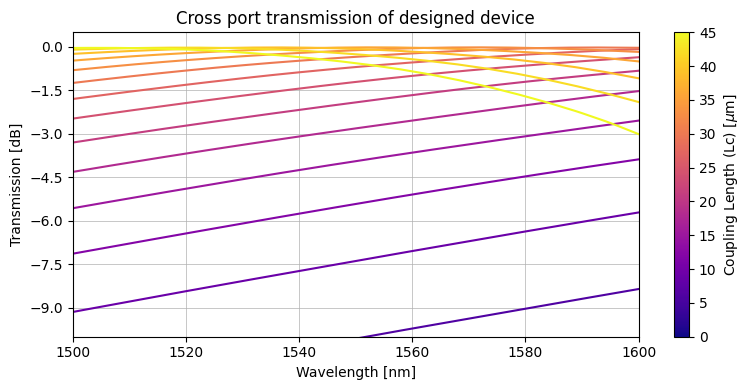

In [80]:
fig, ax = plt.subplots()

lc_values = np.arange(0, 48, 3)
cmap = plt.get_cmap('plasma') # 'viridis', 'plasma', 'inferno' são ótimas opções
norm = plt.Normalize(vmin=lc_values.min(), vmax=lc_values.max())


for i in lc_values:
    icApi.switchtolayout()
    icApi.select('DC1')
    icApi.set('coupling_length', i*um)
    icApi.run()
    data = icApi.getresult('ona1', 'input 1/mode 1/gain')

    ax.plot(data['wavelength']/nm, data['mode 1 gain (dB)'], color=cmap(norm(i)),linewidth=1.5)
ax.grid(which='major', linestyle='-', linewidth=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))

ax.set_ylim(-10,0.5)
ax.set_xlim(1500, 1600) 
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Transmission [dB]')
plt.title('Cross port transmission of designed device')


# barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Necessário para o mapeamento
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Coupling Length (Lc) [$\mu$m]') 

plt.tight_layout()
plt.savefig('device_footprint_colorbar.png', dpi=300)

## Mach-Zehnder Interferometer

In [81]:
icApi.switchtolayout()
icApi.deleteall()

In [82]:
wavelength_start = 1.5e-6
wavelength_stop = 1.6e-6
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,2,1000,c/wavelength_start, c/wavelength_stop)

0

In [83]:
for i in range(2):
    icApi.addelement('personal_DC')
    icApi.set('name', f'DC{i+1}')
    icApi.set('coupling_length', 18*um)
    icApi.setposition(f'DC{i+1}',1000+400*i, 100)
    
    icApi.addelement('straight waveguide')
    icApi.set('name', f'WG{i+1}')
    icApi.set('effective index 1', 2.355)
    icApi.set('group index 1', 4.355)
    icApi.set('length', 100*um + 100*i*um)
    icApi.setposition(f'WG{i+1}',1200, 0+200*i)

In [84]:
# connections
icApi.connect('ona1', 'output', 'DC1', 'port 3')

icApi.connect('DC1', 'port 4', 'WG1', 'port 1')
icApi.connect('DC1', 'port 2', 'WG2', 'port 1')

icApi.connect('DC2', 'port 3', 'WG1', 'port 2')
icApi.connect('DC2', 'port 1', 'WG2', 'port 2')

icApi.connect('DC2', 'port 4', 'ona1', 'input 1')
icApi.connect('DC2', 'port 2', 'ona1', 'input 2')

1.0

In [85]:
icApi.run()

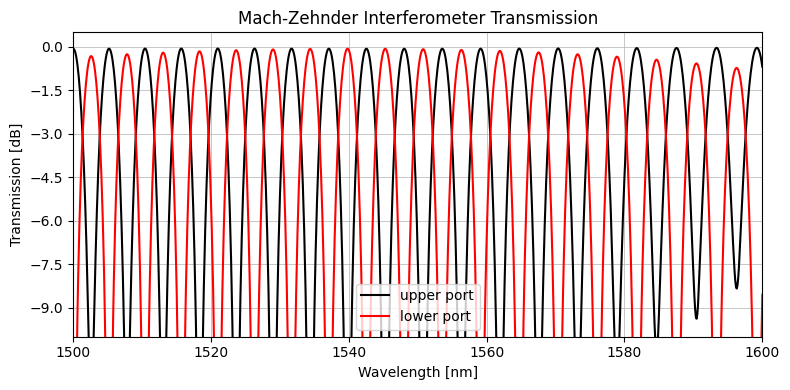

In [86]:
ax = plt.subplot(111)
labels = ['upper port', 'lower port']
colors = ['black', 'red']
for i in range(2):
    data = icApi.getresult(f'ona1', f'input {i+1}/mode 1/gain')
    ax.plot(data['wavelength']/nm, data['mode 1 gain (dB)'], label=labels[i], linewidth=1.5,color=colors[i])
#ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim(-10,0.5)
ax.set_xlim(1500, 1600) # Exemplo
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Transmission [dB]')
plt.title('Mach-Zehnder Interferometer Transmission')
ax.legend()

plt.tight_layout()
plt.savefig('MZI_transmission.png', dpi=300)

## checking coupling coefficients

In [103]:
importlib.reload(tools)
df, outputs = tools.getKappa(icApi,16,startFrequency=c/wavelength_start, stopFrequency=c/wavelength_stop, Lstart=0, Lstop=46*um, step=3*um, elementName='personal_DC', toggle=2)

KeyboardInterrupt: 

In [116]:
icApi.switchtolayout()
icApi.deleteall()

In [117]:
coupling_lengths = np.array([18,12,6])*um
wg_lengths = np.array([40,200,400,40])*um
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,2,1000,c/(1530*nm), c/(1545*nm))

0

In [102]:
df

,Coupling Length (um),Coupling Coefficient (dB)
0,0.0,0.990908
1,3.0,0.956075
2,6.0,0.895240
3,9.0,0.814232
4,12.0,0.712591
5,15.0,0.595671
6,18.0,0.474747
7,21.0,0.356971
8,24.0,0.245598
9,27.0,0.148346


## Lattice filter

In [ ]:
icApi.switchtolayout()
icApi.deleteall()

In [118]:
for i in range(0, len(coupling_lengths)):
    icApi.addelement('personal_DC')
    icApi.set('name', f'DC{i+1}')
    icApi.set('coupling_length', coupling_lengths[i])
    icApi.setposition(f'DC{i+1}',1000+400*i, 100)
for i in range(0, len(wg_lengths)):
    icApi.addelement('ebeam_wg_strip_1550')
    icApi.set('name', f'WG{i+1}')
    icApi.set('wg_length', wg_lengths[i])
    icApi.setposition(f'WG{i+1}',1200, 0+200*i)
icApi.setposition('WG3',1600,0)
icApi.setposition('WG4',1600,200)

In [119]:
icApi.connect('ona1', 'output', 'DC1', 'port 1')

icApi.connect('DC1', 'port 4', 'WG1', 'opt_1')
icApi.connect('DC1', 'port 2', 'WG2', 'opt_1')

icApi.connect('DC2', 'port 3', 'WG1', 'opt_2')
icApi.connect('DC2', 'port 1', 'WG2', 'opt_2')

icApi.connect('DC2', 'port 4', 'WG3', 'opt_1')
icApi.connect('DC2', 'port 2', 'WG4', 'opt_1')

icApi.connect('DC3', 'port 3', 'WG3', 'opt_2')
icApi.connect('DC3', 'port 1', 'WG4', 'opt_2')

icApi.connect('DC3', 'port 4', 'ona1', 'input 1')
icApi.connect('DC3', 'port 2', 'ona1', 'input 2')

1.0

In [120]:
icApi.run()

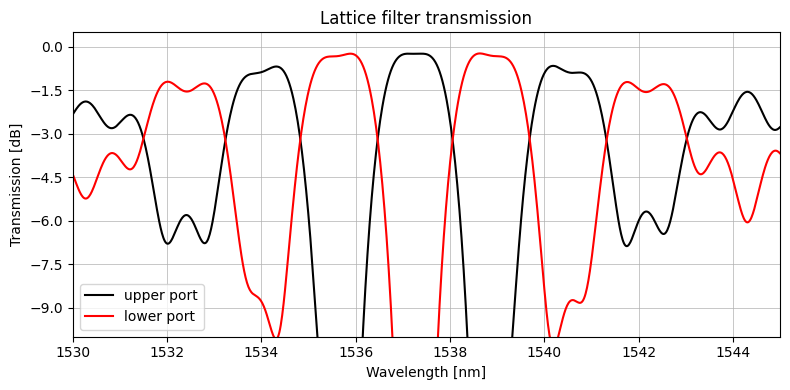

In [122]:
ax = plt.subplot(111)
labels = ['upper port', 'lower port']
colors = ['black', 'red']
for i in range(2):
    data = icApi.getresult(f'ona1', f'input {i+1}/mode 1/gain')
    ax.plot(data['wavelength']/nm, data['mode 1 gain (dB)'], label=labels[i], linewidth=1.5,color=colors[i])
#ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim(-10,0.5)
ax.set_xlim(1530, 1545) # Exemplo
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Transmission [dB]')
plt.title('Lattice filter transmission')
ax.legend()

plt.tight_layout()
plt.savefig('LatticeFilter_transmission.png', dpi=300)